In [1]:
import pandas as pd
import geopandas as gpd
import geocoder 
import matplotlib.pyplot as plt

In [2]:
# Load vaccination site data

v_site = pd.read_csv('../../data/cleaned/sacoronavirus_vaccination_sites.csv')
print(v_site.shape)
v_site.head(10)

(1026, 10)


,Unnamed: 0,District,Sub-District,Vaccination Site Name,Type of site,Pfizer or J&J,Start Date,Site Active (Yes/No),Open Days per week,Capacity per day
0,0,C Hani DM,Enoch Mgijima LM,ec Lizo Ngcana Clinic,Clinic,Pfizer,7/19/2021,To start next week,5 days,80.0
1,1,C Hani DM,Enoch Mgijima LM,ec Lesseyton Clinic,Clinic,Pfizer,7/19/2021,To start next week,5 days,80.0
2,2,O Tambo DM,King Sabata Dalindyebo LM,ec SOS Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0
3,3,O Tambo DM,King Sabata Dalindyebo LM,ec Ntshele Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0
4,4,O Tambo DM,King Sabata Dalindyebo LM,ec Sangoni Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0
5,5,O Tambo DM,King Sabata Dalindyebo LM,ec Qokolweni Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0
6,6,O Tambo DM,King Sabata Dalindyebo LM,ec Maxwele Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0
7,7,O Tambo DM,King Sabata Dalindyebo LM,ec Mpeko Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0
8,8,O Tambo DM,King Sabata Dalindyebo LM,ec Ngqwarha Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0
9,9,O Tambo DM,King Sabata Dalindyebo LM,ec Ngcengane Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0


In [25]:
# Test geocoding

#search = v_site['Vaccination Site Name'][0] + " Ngqushwa LM, South Africa"


search = "Wesley Clinic, Ngqushwa LM, South Africa "

print(search)

g = geocoder.bing(search, key="AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re")

g.latlng


Wesley Clinic, Ngqushwa LM, South Africa 


[-33.31734, 27.34098]

In [23]:
v_site.loc[v_site['Vaccination Site Name'] == 'ec Wesley Clinic']

,Unnamed: 0,District,Sub-District,Vaccination Site Name,Type of site,Pfizer or J&J,Start Date,Site Active (Yes/No),Open Days per week,Capacity per day
208,208,Amathole DM,Ngqushwa LM,ec Wesley Clinic,Clinic,J&J,2021-06-09 00:00:00,Yes,5 days,40.0


In [26]:
# It works, now can create an array with all the sites

# sites = {}

# key = "AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re"

# progress = 0

# for site in v_site['Vaccination Site Name']:

#     sub_dist = v_site.loc[v_site['Vaccination Site Name'] == site]['Sub-District']

#     if(progress % 10 == 0):
#         print(progress*100/1026)
#     progress = progress + 1
#     g = None
#     try:
#         g = geocoder.bing(site + ", " + sub_dist + ", South Africa", key=key)
#         sites[site] = g.latlng
#     except: 
#         sites[site] = None
#         print("Not Found:", site)



0.0
0.9746588693957114
1.949317738791423
2.9239766081871346
3.898635477582846
4.8732943469785575
5.847953216374269
6.822612085769981
7.797270955165692
8.771929824561404
9.746588693957115
10.721247563352826
11.695906432748538
12.670565302144249
13.645224171539962
14.619883040935672
15.594541910331383
16.569200779727094
17.54385964912281
18.51851851851852
19.49317738791423
20.46783625730994
21.44249512670565
22.417153996101366
23.391812865497077
24.366471734892787
25.341130604288498
26.31578947368421
27.290448343079923
28.265107212475634
29.239766081871345
30.214424951267056


Status code 429 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 429 Client Error: Too Many Requests for url: http://dev.virtualearth.net/REST/v1/Locations?q=Worcester+Town+Hall%2C+Breede+Valley+Municipality%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


31.189083820662766
32.16374269005848
33.13840155945419
34.113060428849906
35.08771929824562
36.06237816764133
37.03703703703704
38.01169590643275
38.98635477582846
39.96101364522417
40.93567251461988
41.91033138401559
42.8849902534113
43.85964912280702
44.83430799220273
45.80896686159844
46.78362573099415
47.758284600389864


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Demar+Building%2C+Main+Road%2C+Knysna%2C+Bitou+LM%2C+South+Africa&q=Demar+Building%2C+Main+Road%2C+Knysna%2C+Knysna+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


48.732943469785575


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Demar+Building%2C+Main+Road%2C+Knysna%2C+Bitou+LM%2C+South+Africa&q=Demar+Building%2C+Main+Road%2C+Knysna%2C+Knysna+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


49.707602339181285
50.682261208576996
51.65692007797271
52.63157894736842
53.606237816764136
54.580896686159846
55.55555555555556


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Phillip+Moyo+CHC%2C+ekurhuleni+E%2C+South+Africa&q=Phillip+Moyo+CHC%2C+ekurhuleni+E%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1
Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Phillip+Moyo+CHC%2C+ekurhuleni+E%2C+South+Africa&q=Phillip+Moyo+CHC%2C+ekurhuleni+E%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


56.53021442495127
57.50487329434698
58.47953216374269
59.4541910331384
60.42884990253411
61.40350877192982
62.37816764132553
63.35282651072125


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1
Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


64.32748538011695


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&q=Prof+ZK+Matthews+Hospital%2C+Dikgatlong+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


65.30214424951266
66.27680311890838


Status code 429 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 429 Client Error: Too Many Requests for url: http://dev.virtualearth.net/REST/v1/Locations?q=Itsoseng%2C+Disobotla%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


67.25146198830409
68.22612085769981
69.20077972709552
70.17543859649123
71.15009746588694
72.12475633528265
73.09941520467837
74.07407407407408
75.04873294346979
76.0233918128655
76.99805068226121


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Ndundulu+Clinic%2C+Mthonjaneni+LM%2C+South+Africa&q=Ndundulu+Clinic%2C+Mthonjaneni+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1
Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=KwaMagwaza+Hospital%2C+Mthonjaneni+LM%2C+South+Africa&q=KwaMagwaza+Hospital%2C+Mthonjaneni+LM%2C+South+Africa&q=KwaMagwaza+Hospital%2C+Mthonjaneni+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1
Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Ndundulu+Clinic%2C+Mthonjaneni+LM%2C+South+Afri

77.97270955165692


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=KwaMagwaza+Hospital%2C+Mthonjaneni+LM%2C+South+Africa&q=KwaMagwaza+Hospital%2C+Mthonjaneni+LM%2C+South+Africa&q=KwaMagwaza+Hospital%2C+Mthonjaneni+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


78.94736842105263
79.92202729044834
80.89668615984405
81.87134502923976


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Machadodorp+Clinic%2C+Emakhazeni+LM%2C+South+Africa&q=Machadodorp+Clinic%2C+Emakhazeni+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1
Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Sakhelwe+Clinic%2C+Emakhazeni+LM%2C+South+Africa&q=Sakhelwe+Clinic%2C+Emakhazeni+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


82.84600389863547
83.82066276803118


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Mmametlhake+Hospital%2C+Dr+JS+Moroka+LM%2C+South+Africa&q=Mmametlhake+Hospital%2C+Dr+JS+Moroka+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


84.7953216374269
85.7699805068226
86.74463937621833
87.71929824561404


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Mmametlhake+Hospital%2C+Dr+JS+Moroka+LM%2C+South+Africa&q=Mmametlhake+Hospital%2C+Dr+JS+Moroka+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


88.69395711500975
89.66861598440546
90.64327485380117


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Machadodorp+Clinic%2C+Emakhazeni+LM%2C+South+Africa&q=Machadodorp+Clinic%2C+Emakhazeni+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1
Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Sakhelwe+Clinic%2C+Emakhazeni+LM%2C+South+Africa&q=Sakhelwe+Clinic%2C+Emakhazeni+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


91.61793372319688


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Embhuleni+Hospital%2C+Chief+Albert+Luthuli+LM%2C+South+Africa&q=Embhuleni+Hospital%2C+Chief+Albert+Luthuli+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


92.5925925925926


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Embhuleni+Hospital%2C+Chief+Albert+Luthuli+LM%2C+South+Africa&q=Embhuleni+Hospital%2C+Chief+Albert+Luthuli+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


93.5672514619883
94.54191033138402
95.51656920077973
96.49122807017544


Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Groblersdal+Hospital%2C+E+Motsoaledi+LM%2C+South+Africa&q=Groblersdal+Hospital%2C+E+Motsoaledi+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1
Status code 400 from http://dev.virtualearth.net/REST/v1/Locations: ERROR - 400 Client Error: Bad Request for url: http://dev.virtualearth.net/REST/v1/Locations?q=Groblersdal+Hospital%2C+E+Motsoaledi+LM%2C+South+Africa&q=Groblersdal+Hospital%2C+E+Motsoaledi+LM%2C+South+Africa&o=json&inclnb=1&key=AtQwmq9_62aeu5WWmT4gwSlEVL22WsnR_RxrRokFgqVMvDe0Q3uGWNmCOKErz1Re&maxResults=1


97.46588693957115
98.44054580896686
99.41520467836257


In [5]:
import json

f = open('geocoded_sites2.json')

sites = json.load(f)

f.close()

In [6]:
len(sites)

1014

In [28]:
with open('geocoded_sites2.json', 'w') as f:
    json.dump(sites, f)

In [7]:
# Load this newly aquired information into a pandas dataframe

import numpy as np

sites_with_coords = pd.DataFrame()

sites_with_coords = v_site.copy(deep=True)

def getLatLon(site):
    return sites[site]


site_long = {}
site_lat = {}
for index, site in enumerate(sites):
    try:
        site_long[site] = sites[site][1]
        site_lat[site] = sites[site][0]
    except:
        print(site, sites[site])

sites_with_coords['Latitude'] = v_site['Vaccination Site Name'].map(site_lat)
sites_with_coords['Longitude'] = v_site['Vaccination Site Name'].map(site_long)
# for index, site in enumerate(sites):
#     coords = sites[site]
#     sites_with_coords.loc[sites_with_coords['Vaccination Site Name'] == site, ['Latitude']] = coords[0]
#     sites_with_coords.loc[sites_with_coords['Vaccination Site Name'] == site, ['Longitude']] = coords[1]

sites_with_coords
    



Worcester Town Hall None
Demar Building, Main Road, Knysna None
Phillip Moyo CHC None
Prof ZK Matthews Hospital None
Itsoseng None
Ndundulu Clinic None
KwaMagwaza Hospital None
Machadodorp Clinic None
Sakhelwe Clinic None
Mmametlhake Hospital None
Embhuleni Hospital None
Groblersdal Hospital None


,Unnamed: 0,District,Sub-District,Vaccination Site Name,Type of site,Pfizer or J&J,Start Date,Site Active (Yes/No),Open Days per week,Capacity per day,Latitude,Longitude
0,0,C Hani DM,Enoch Mgijima LM,ec Lizo Ngcana Clinic,Clinic,Pfizer,7/19/2021,To start next week,5 days,80.0,-31.907130,26.962980
1,1,C Hani DM,Enoch Mgijima LM,ec Lesseyton Clinic,Clinic,Pfizer,7/19/2021,To start next week,5 days,80.0,-31.848430,26.777950
2,2,O Tambo DM,King Sabata Dalindyebo LM,ec SOS Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0,-31.736370,28.468560
3,3,O Tambo DM,King Sabata Dalindyebo LM,ec Ntshele Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0,-31.674090,28.731040
4,4,O Tambo DM,King Sabata Dalindyebo LM,ec Sangoni Clinic,Clinic,J&J,6/16/2021,Yes,5 days,40.0,-31.736370,28.468560
...,...,...,...,...,...,...,...,...,...,...,...,...
1021,66,Waterberg District,Mogalakwena LM,Voortrekker Team A,Mobile Outreach Site,J&J,7/12/2021,yes,4 days,NaN,-24.309860,28.933010
1022,67,Mopani District,Greater Tzaneen LM,Van Velden Team A,Mobile Outreach site,J&J,12/07/2021,Yes,4 days,NaN,-23.839720,30.162380
1023,68,Sekhukhune District,Fetakgomo Tubatse LM,Mecklenburg team B,Mobile Outreach teams,J&J,7/12/2021,Yes,4 days,NaN,-28.996321,25.087143
1024,69,Vhembe District,Makhado LM,Siloam Team A,Mobile Outreach team,J&J,7/12/2021,Yes,4 days,NaN,-28.996321,25.087143


In [8]:
# Check the completeness of the data
# find the rows where latitude is none

print('Unique Coords:', 'lat:', len(sites_with_coords["Latitude"].unique()), 'lon:', len(sites_with_coords['Longitude'].unique()))

import geopandas as gpd

sites_v2 = gpd.GeoDataFrame(sites_with_coords, geometry=gpd.points_from_xy(sites_with_coords['Longitude'], sites_with_coords['Latitude']))


print(sites_with_coords.groupby('Latitude')['Latitude'].count().sort_values(ascending=False))
print(sites_with_coords.groupby('Longitude')['Longitude'].count().sort_values(ascending=False).head(20))
# sites_v2.plot(column='District')
    


Unique Coords: lat: 574 lon: 574
Latitude
-28.996321    167
-29.579580     30
-25.152700     17
-31.736370     14
-25.168860     11
             ... 
-32.605690      1
-32.657090      1
-32.669560      1
-32.692510      1
-22.327040      1
Name: Latitude, Length: 573, dtype: int64
Longitude
25.087143    167
30.388820     30
28.455150     17
28.468560     14
28.416670     11
18.055760     10
27.587020     10
29.280050      8
26.937390      8
25.656710      7
27.537840      6
30.961160      6
25.483920      6
27.342410      6
18.833110      5
18.750000      5
28.414680      4
24.344680      4
19.368740      4
28.046110      4
Name: Longitude, dtype: int64


It seems like a lot of the results landed in the middle of south africa, we can exclude these results and and use the centroid of their subdistrict as the the marker.

<AxesSubplot:>

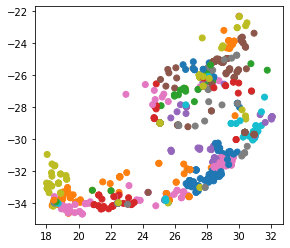

In [10]:
sites_v2.plot(column='District')

In [11]:
#export the data

sites_v2.to_file('../../data/sites_with_coords_estimated.json', driver='GeoJSON')